## Задание 1. Выбор данных и постановка задачи

Этот набор данных направлен на анализ общественных предпочтений между двумя популярными типами отдыха: горами и пляжами. Он дает представление о различных демографических факторах и факторах образа жизни, которые могут влиять на эти предпочтения. Изучая этот набор данных, можно применить несколько методов машинного обучения, чтобы предсказать, предпочитают ли люди **горы или пляжи**, основываясь на их характеристиках.

In [6]:
import pandas as pd
import numpy as np

In [7]:
data = pd.read_csv('Kosteva_mountains_vs_beaches_preferences.csv', sep=',')
data.head(5)

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56,male,71477,bachelor,9,skiing,2477,urban,175,267,summer,0,1,1
1,69,male,88740,master,1,swimming,4777,suburban,228,190,fall,0,1,0
2,46,female,46562,master,0,skiing,1469,urban,71,280,winter,0,0,1
3,32,non-binary,99044,high school,6,hiking,1482,rural,31,255,summer,1,0,1
4,60,female,106583,high school,5,sunbathing,516,suburban,23,151,winter,1,1,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52444 entries, 0 to 52443
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     52444 non-null  int64 
 1   Gender                  52444 non-null  object
 2   Income                  52444 non-null  int64 
 3   Education_Level         52444 non-null  object
 4   Travel_Frequency        52444 non-null  int64 
 5   Preferred_Activities    52444 non-null  object
 6   Vacation_Budget         52444 non-null  int64 
 7   Location                52444 non-null  object
 8   Proximity_to_Mountains  52444 non-null  int64 
 9   Proximity_to_Beaches    52444 non-null  int64 
 10  Favorite_Season         52444 non-null  object
 11  Pets                    52444 non-null  int64 
 12  Environmental_Concerns  52444 non-null  int64 
 13  Preference              52444 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 5.6+ MB


## Задание 2. Описание переменных

Сначала по смыслу (что это за данные, описание зависимой и независимых переменных, какие есть категории в категориальных переменных, сколько их, сколько наблюдений в каждой), посмотреть распределение, наличие сильной связи между переменными и связь между зависимой и независимыми переменными и т.д.

In [10]:
# посмотрим на данные: выведем столбцы, их значения и количество
for c in data.columns:
    print(data[c].value_counts(dropna=False))

Age
34    1099
65    1097
30    1083
40    1078
32    1063
43    1061
69    1057
64    1053
45    1050
55    1038
61    1035
35    1031
46    1031
21    1023
56    1023
47    1014
59    1014
33    1013
53    1013
26    1012
27    1012
38    1012
22    1012
68    1009
62    1007
41    1006
42    1005
39    1004
36    1004
31    1001
19    1001
58    1001
54    1000
20    1000
49     999
25     999
57     989
24     987
28     981
66     980
44     979
50     976
52     975
29     972
23     969
48     965
37     964
63     960
18     958
67     958
51     946
60     925
Name: count, dtype: int64
Gender
female        17638
male          17522
non-binary    17284
Name: count, dtype: int64
Income
109283    7
114814    6
72412     6
96111     5
117850    5
         ..
71676     1
119865    1
118380    1
33918     1
34475     1
Name: count, Length: 40983, dtype: int64
Education_Level
doctorate      13293
bachelor       13127
high school    13072
master         12952
Name: count, dtype: int64

- Age - возраст человека, количественная, int64 
- Gender - пол человека (male, female, non-binary), категориальная, object
- Income - годовой доход человека, количественная, int64 
- Education_Level - уровень образования (high school, bachelor, master, doctorate), категориальная, object
- Travel_Frequency - число отпусков в год, количественная, int64 
- Preferred_Activities - предпочитаемый вид активности на отдыхе (hiking, swimming, skiing, sunbathing), категориальная, object
- Vacation_Budget - выделенный бюджет на отпуск, количественная, int64 
- Location - место проживания человека (urban, suburban, rural), категориальная, object
- Proximity_to_Mountains - расстояние до ближайших гор(в милях), количественная, int64 
- Proximity_to_Beaches - расстояние до ближайших пляжей(в милях), количественная, int64 
- Favorite_Season - предпочитаемый сезон для отдыха (summer, winter, spring, fall), категориальная, object
- Pets - наличие домашних животных, dummy переменная (0 = нет, 1 = да), int64 
- Environmental_Concerns - беспокоит ли человека состояние окружающей среды, dummy переменная (0 = нет, 1 = да), int64 
- Preference - предпочтение по отдыху (0 = пляж, 1 = горы), dummy переменная, int64


**Целевой признак** - Preference - предпочел человек отдых на пляже или в горах

In [12]:
# рассмотрим связь между признаками
print("age: ", data['Age'].corr(data['Preference']))
print("income: ", data['Income'].corr(data['Preference']))
print("travel_frequency: ", data['Travel_Frequency'].corr(data['Preference']))
print("budget: ", data['Vacation_Budget'].corr(data['Preference']))
print("proximity_to_mountains: ", data['Proximity_to_Mountains'].corr(data['Preference']))
print("proximity_to_beaches: ", data['Proximity_to_Beaches'].corr(data['Preference']))
print("pets: ", data['Pets'].corr(data['Preference']))
print("environmental_concerns: ", data['Environmental_Concerns'].corr(data['Preference']))

age:  0.000990032081563712
income:  -0.002997745377199706
travel_frequency:  -0.0016803615539361496
budget:  -0.004753577128232521
proximity_to_mountains:  -0.33537286057966825
proximity_to_beaches:  0.3348476400531061
pets:  -0.011375325454480906
environmental_concerns:  0.0014569079063912471


**берем в итоговую выборку:** proximity_to_mountains, proximity_to_beaches, pets

*age, income, travel_frequency, budget и environmental_concerns* показывают корреляцию ближе к 0

лучше оценить эти зависимости можно сделав признаки категориальными

In [14]:
features = ['Proximity_to_Mountains', 'Proximity_to_Beaches', 'Pets']

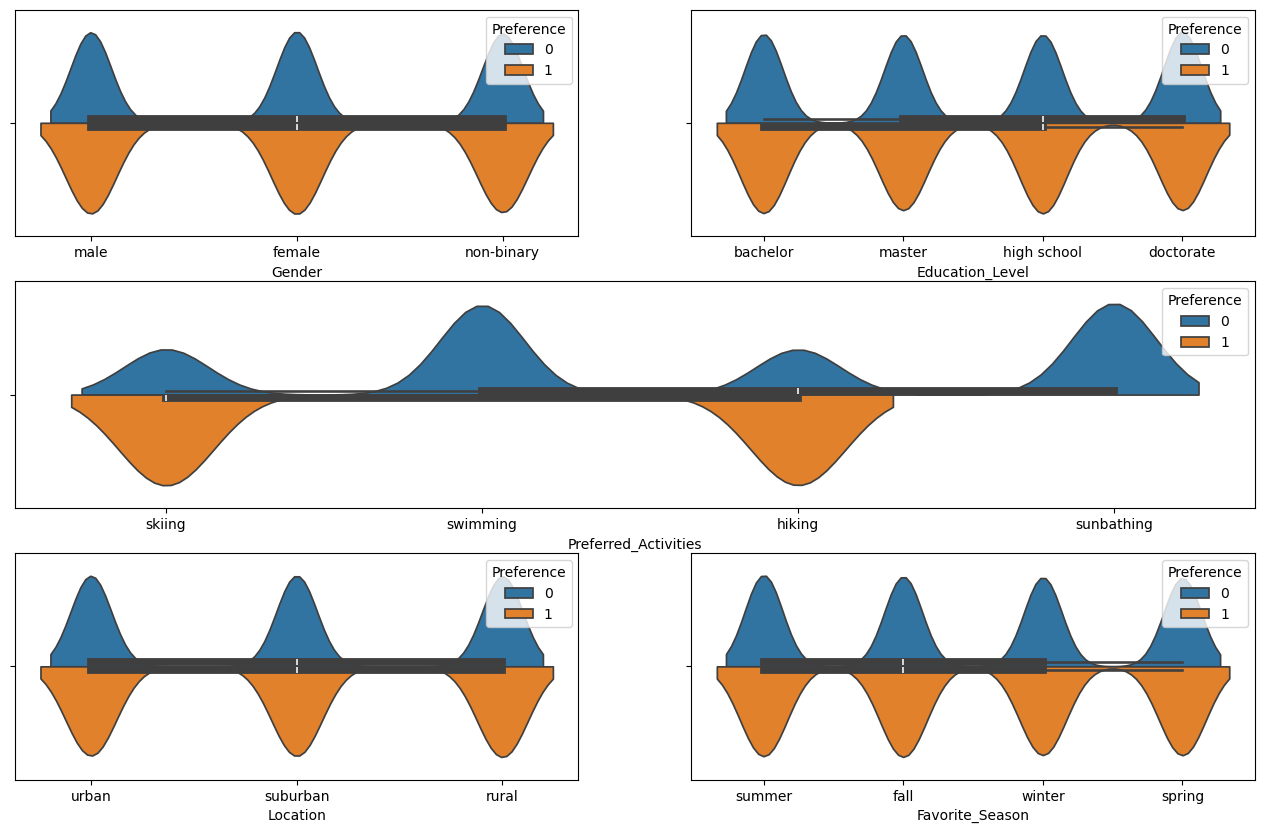

In [15]:
# рассмотрим связь между категориальными признаками и целевым

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns

fig = plt.figure(figsize = (16,10))
g = fig.add_gridspec (3,2)
ax1 = fig.add_subplot(g[:1, :1])
sns.violinplot(x = "Gender", hue = 'Preference', split = True, data=data)
ax2 = fig.add_subplot(g[:1, 1:]) 
sns.violinplot(x="Education_Level",hue = 'Preference', split = True, data=data)
ax3 = fig.add_subplot(g[1:2, 0:]) 
sns.violinplot(x="Preferred_Activities",hue = 'Preference', split = True, data=data)
ax4 = fig.add_subplot(g[2:, :1]) 
sns.violinplot(x="Location",hue = 'Preference', split = True, data=data)
ax5 = fig.add_subplot(g[2:, 1:]) 
sns.violinplot(x="Favorite_Season",hue = 'Preference', split = True, data=data)

plt.show()

##### gender, education_level, location и favorite_season не показывают разницу в выборе отдыха

gender скорее всего не показывает разницу из-за категории non-binary, education_level скорее всего не влияет

features = ['Proximity_to_Mountains', 'Proximity_to_Beaches', 'Pets', 'Preferred_Activities']

In [17]:
# рассмотрим зависимости между переменными
print("age-income: ", data['Age'].corr(data['Income']))
print("income-Travel_Frequency : ", data['Income'].corr(data['Travel_Frequency']))
print("income-budget : ", data['Income'].corr(data['Vacation_Budget']))

age-income:  -5.054528447450909e-06
income-Travel_Frequency :  -0.00037816180812256123
income-budget :  -0.0007310082165314869


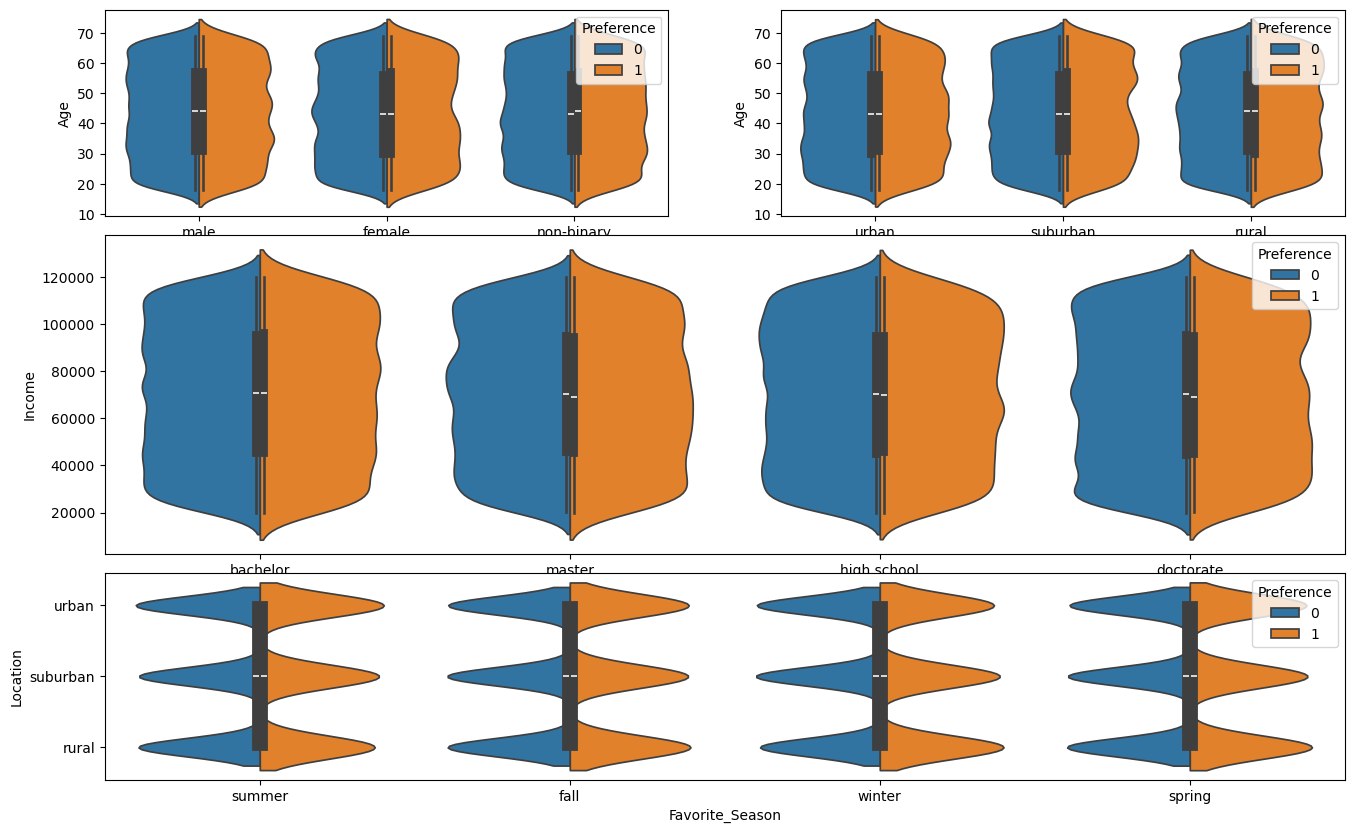

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns

fig = plt.figure(figsize = (16,10))
g = fig.add_gridspec (7,2)
ax1 = fig.add_subplot(g[:2, :1])
sns.violinplot(x = "Gender", y = "Age", hue = 'Preference', split = True, data=data)
ax2 = fig.add_subplot(g[:2, 1:]) 
sns.violinplot(x="Location", y = "Age",hue = 'Preference', split = True, data=data)
ax3 = fig.add_subplot(g[2:5, 0:]) 
sns.violinplot(y="Income", x = "Education_Level", hue = 'Preference', split = True, data=data)
ax4 = fig.add_subplot(g[5:, 0:]) 
sns.violinplot(x="Favorite_Season", y = "Location", hue = 'Preference', split = True, data=data)

plt.show()

## Задание 3. Подготовка датасета

Проверка датасета на однородность данных, наличие пропусков, дубликатов, выбросов и т.д.

In [20]:
print(data.isnull().sum())

Age                       0
Gender                    0
Income                    0
Education_Level           0
Travel_Frequency          0
Preferred_Activities      0
Vacation_Budget           0
Location                  0
Proximity_to_Mountains    0
Proximity_to_Beaches      0
Favorite_Season           0
Pets                      0
Environmental_Concerns    0
Preference                0
dtype: int64


In [21]:
data= data.drop_duplicates()

## Задание 4. Выбор модели машинного обучения

Какие модели машинного обучения вы будете использовать (взять хотя бы две для сравнения). Описываете с какими данными каждая модель работает и каким образом вам нужно будет преобразовать датасет.

Для классификации с целевым признаком Preference применим два алгоритма классификации, которые хорошо работают на больших данных: 
1. Gradient Boosting — метод градиентного бустинга, который улучшает прогнозы путем последовательного уменьшения ошибки.
2. Random Forest — случайные леса также способны хорошо работать с целочисленными признаками. Они создают множество деревьев решений на подвыборках данных и усредняют их прогнозы. Это делает метод устойчивым к шуму и переобучению.

In [152]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Задание 5. Конструирование признаков

#### Кодирование в лексикографическом порядке

In [27]:
print(data['Gender'].unique())

['male' 'female' 'non-binary']


In [28]:
data['Gender'] = data['Gender'].replace({'female': 0, 'male': 1, 'non-binary': 2}).astype(int)
data.head()
print("gender: ", data['Gender'].corr(data['Preference']))

#зависимости практически нет

gender:  0.0002560826372632294


C:\Users\ElenaKosteva\AppData\Local\Temp\ipykernel_1868\3493542391.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender'] = data['Gender'].replace({'female': 0, 'male': 1, 'non-binary': 2}).astype(int)


#### Dummy кодирование

In [30]:
# hiking - базовая переменная
data = pd.get_dummies(data, columns=['Preferred_Activities'], drop_first=True)
data.head()

,Age,Gender,Income,Education_Level,Travel_Frequency,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference,Preferred_Activities_skiing,Preferred_Activities_sunbathing,Preferred_Activities_swimming
0,56,1,71477,bachelor,9,2477,urban,175,267,summer,0,1,1,True,False,False
1,69,1,88740,master,1,4777,suburban,228,190,fall,0,1,0,False,False,True
2,46,0,46562,master,0,1469,urban,71,280,winter,0,0,1,True,False,False
3,32,2,99044,high school,6,1482,rural,31,255,summer,1,0,1,False,False,False
4,60,0,106583,high school,5,516,suburban,23,151,winter,1,1,0,False,True,False


In [31]:
data['Preferred_Activities_skiing'] = data['Preferred_Activities_skiing'].replace({'False': 0, 'True': 1}).astype(int)
data['Preferred_Activities_sunbathing'] = data['Preferred_Activities_sunbathing'].replace({'False': 0, 'True': 1}).astype(int)
data['Preferred_Activities_swimming'] = data['Preferred_Activities_swimming'].replace({'False': 0, 'True': 1}).astype(int)
data.head()

,Age,Gender,Income,Education_Level,Travel_Frequency,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference,Preferred_Activities_skiing,Preferred_Activities_sunbathing,Preferred_Activities_swimming
0,56,1,71477,bachelor,9,2477,urban,175,267,summer,0,1,1,1,0,0
1,69,1,88740,master,1,4777,suburban,228,190,fall,0,1,0,0,0,1
2,46,0,46562,master,0,1469,urban,71,280,winter,0,0,1,1,0,0
3,32,2,99044,high school,6,1482,rural,31,255,summer,1,0,1,0,0,0
4,60,0,106583,high school,5,516,suburban,23,151,winter,1,1,0,0,1,0


In [32]:
features = ['Proximity_to_Mountains', 'Proximity_to_Beaches', 'Pets', 'Preferred_Activities_skiing', 'Preferred_Activities_sunbathing',
            'Preferred_Activities_swimming']

##### Разделение на группы

**Age**

In [35]:
#возраст
print(data['Age'].unique())
print(data['Age'].min())
print(data['Age'].max())

[56 69 46 32 60 25 38 36 40 28 41 53 57 20 39 19 61 47 55 50 29 42 66 44
 59 45 33 64 68 54 24 26 35 21 31 67 43 37 52 34 23 51 27 48 65 62 58 18
 22 30 49 63]
18
69


In [36]:
data['Age_group'] = pd.cut(data['Age'], bins=[17, 25, 50, 70], labels=['young_man', 'adult', 'senior'])
data.head()

,Age,Gender,Income,Education_Level,Travel_Frequency,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference,Preferred_Activities_skiing,Preferred_Activities_sunbathing,Preferred_Activities_swimming,Age_group
0,56,1,71477,bachelor,9,2477,urban,175,267,summer,0,1,1,1,0,0,senior
1,69,1,88740,master,1,4777,suburban,228,190,fall,0,1,0,0,0,1,senior
2,46,0,46562,master,0,1469,urban,71,280,winter,0,0,1,1,0,0,adult
3,32,2,99044,high school,6,1482,rural,31,255,summer,1,0,1,0,0,0,adult
4,60,0,106583,high school,5,516,suburban,23,151,winter,1,1,0,0,1,0,senior


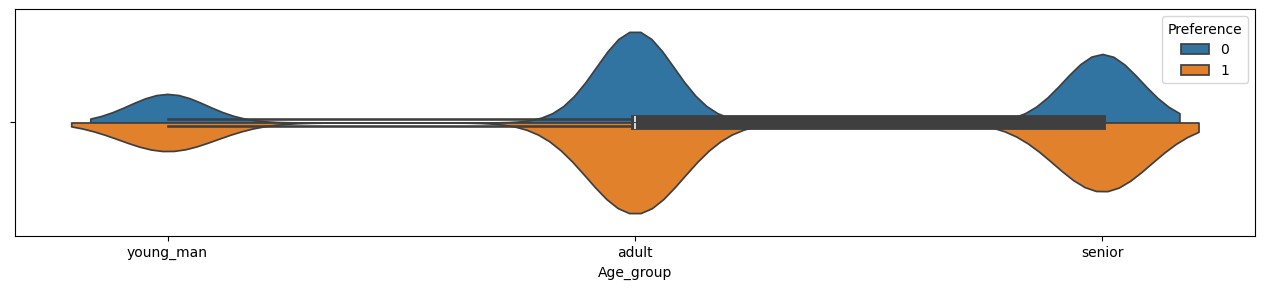

In [37]:
fig = plt.figure(figsize = (16,10))
g = fig.add_gridspec (3,2)
ax1 = fig.add_subplot(g[:1, 0:])
sns.violinplot(x = "Age_group", hue = 'Preference', split = True, data=data)

plt.show()
#разница несильная, но немного присутсвует - возьмем в итоговую выборку

In [38]:
# young_man - базовая переменная
data = pd.get_dummies(data, columns=['Age_group'], drop_first=True)
data.head()

,Age,Gender,Income,Education_Level,Travel_Frequency,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference,Preferred_Activities_skiing,Preferred_Activities_sunbathing,Preferred_Activities_swimming,Age_group_adult,Age_group_senior
0,56,1,71477,bachelor,9,2477,urban,175,267,summer,0,1,1,1,0,0,False,True
1,69,1,88740,master,1,4777,suburban,228,190,fall,0,1,0,0,0,1,False,True
2,46,0,46562,master,0,1469,urban,71,280,winter,0,0,1,1,0,0,True,False
3,32,2,99044,high school,6,1482,rural,31,255,summer,1,0,1,0,0,0,True,False
4,60,0,106583,high school,5,516,suburban,23,151,winter,1,1,0,0,1,0,False,True


In [39]:
data['Age_group_adult'] = data['Age_group_adult'].replace({'False': 0, 'True': 1}).astype(int)
data['Age_group_senior'] = data['Age_group_senior'].replace({'False': 0, 'True': 1}).astype(int)
data.head()

,Age,Gender,Income,Education_Level,Travel_Frequency,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference,Preferred_Activities_skiing,Preferred_Activities_sunbathing,Preferred_Activities_swimming,Age_group_adult,Age_group_senior
0,56,1,71477,bachelor,9,2477,urban,175,267,summer,0,1,1,1,0,0,0,1
1,69,1,88740,master,1,4777,suburban,228,190,fall,0,1,0,0,0,1,0,1
2,46,0,46562,master,0,1469,urban,71,280,winter,0,0,1,1,0,0,1,0
3,32,2,99044,high school,6,1482,rural,31,255,summer,1,0,1,0,0,0,1,0
4,60,0,106583,high school,5,516,suburban,23,151,winter,1,1,0,0,1,0,0,1


In [40]:
features = ['Proximity_to_Mountains', 'Proximity_to_Beaches', 'Pets', 'Preferred_Activities_skiing', 'Preferred_Activities_sunbathing',
            'Preferred_Activities_swimming', 'Age_group_adult', 'Age_group_senior']

**Vacation_Budget**

In [42]:
#доход
data['ratio_Vacation_Budget'] = data['Vacation_Budget'] / data['Income']
data.head()

,Age,Gender,Income,Education_Level,Travel_Frequency,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference,Preferred_Activities_skiing,Preferred_Activities_sunbathing,Preferred_Activities_swimming,Age_group_adult,Age_group_senior,ratio_Vacation_Budget
0,56,1,71477,bachelor,9,2477,urban,175,267,summer,0,1,1,1,0,0,0,1,0.034655
1,69,1,88740,master,1,4777,suburban,228,190,fall,0,1,0,0,0,1,0,1,0.053831
2,46,0,46562,master,0,1469,urban,71,280,winter,0,0,1,1,0,0,1,0,0.031549
3,32,2,99044,high school,6,1482,rural,31,255,summer,1,0,1,0,0,0,1,0,0.014963
4,60,0,106583,high school,5,516,suburban,23,151,winter,1,1,0,0,1,0,0,1,0.004841


In [43]:
print("ratio: ", data['ratio_Vacation_Budget'].corr(data['Preference']))
# коэффицент корреляции очень маленький

ratio:  0.000825321030440693


In [44]:
print(data['Vacation_Budget'].value_counts())
print(data['Vacation_Budget'].min())
print(data['Vacation_Budget'].max())

Vacation_Budget
2971    27
1645    26
2195    25
4482    24
4021    24
        ..
2831     3
4744     2
2664     2
678      2
2641     1
Name: count, Length: 4500, dtype: int64
500
4999


In [45]:
data['Vacation_Budget_group'] = pd.cut(data['Vacation_Budget'], bins=[499, 1500, 3500, 5000], labels=['small', 'medium', 'big'])
data.head()

,Age,Gender,Income,Education_Level,Travel_Frequency,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference,Preferred_Activities_skiing,Preferred_Activities_sunbathing,Preferred_Activities_swimming,Age_group_adult,Age_group_senior,ratio_Vacation_Budget,Vacation_Budget_group
0,56,1,71477,bachelor,9,2477,urban,175,267,summer,0,1,1,1,0,0,0,1,0.034655,medium
1,69,1,88740,master,1,4777,suburban,228,190,fall,0,1,0,0,0,1,0,1,0.053831,big
2,46,0,46562,master,0,1469,urban,71,280,winter,0,0,1,1,0,0,1,0,0.031549,small
3,32,2,99044,high school,6,1482,rural,31,255,summer,1,0,1,0,0,0,1,0,0.014963,small
4,60,0,106583,high school,5,516,suburban,23,151,winter,1,1,0,0,1,0,0,1,0.004841,small


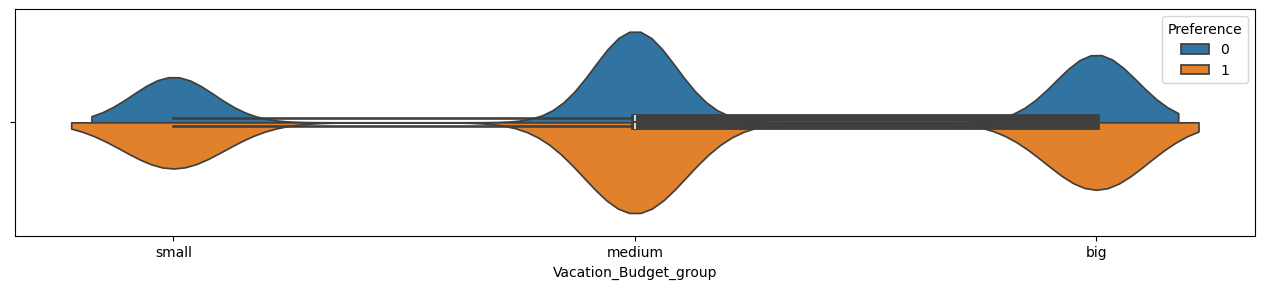

In [46]:
fig = plt.figure(figsize = (16,10))
g = fig.add_gridspec (3,2)
ax1 = fig.add_subplot(g[:1, 0:])
sns.violinplot(x = "Vacation_Budget_group", hue = 'Preference', split = True, data=data)

plt.show()
#небольшая разница, но есть - возьмем в итоговую выборку

In [47]:
# small - базовая переменная
data = pd.get_dummies(data, columns=['Vacation_Budget_group'], drop_first=True)
data.head()

,Age,Gender,Income,Education_Level,Travel_Frequency,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,...,Environmental_Concerns,Preference,Preferred_Activities_skiing,Preferred_Activities_sunbathing,Preferred_Activities_swimming,Age_group_adult,Age_group_senior,ratio_Vacation_Budget,Vacation_Budget_group_medium,Vacation_Budget_group_big
0,56,1,71477,bachelor,9,2477,urban,175,267,summer,...,1,1,1,0,0,0,1,0.034655,True,False
1,69,1,88740,master,1,4777,suburban,228,190,fall,...,1,0,0,0,1,0,1,0.053831,False,True
2,46,0,46562,master,0,1469,urban,71,280,winter,...,0,1,1,0,0,1,0,0.031549,False,False
3,32,2,99044,high school,6,1482,rural,31,255,summer,...,0,1,0,0,0,1,0,0.014963,False,False
4,60,0,106583,high school,5,516,suburban,23,151,winter,...,1,0,0,1,0,0,1,0.004841,False,False


In [48]:
data['Vacation_Budget_group_medium'] = data['Vacation_Budget_group_medium'].replace({'False': 0, 'True': 1}).astype(int)
data['Vacation_Budget_group_big'] = data['Vacation_Budget_group_big'].replace({'False': 0, 'True': 1}).astype(int)
data.head()

,Age,Gender,Income,Education_Level,Travel_Frequency,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,...,Environmental_Concerns,Preference,Preferred_Activities_skiing,Preferred_Activities_sunbathing,Preferred_Activities_swimming,Age_group_adult,Age_group_senior,ratio_Vacation_Budget,Vacation_Budget_group_medium,Vacation_Budget_group_big
0,56,1,71477,bachelor,9,2477,urban,175,267,summer,...,1,1,1,0,0,0,1,0.034655,1,0
1,69,1,88740,master,1,4777,suburban,228,190,fall,...,1,0,0,0,1,0,1,0.053831,0,1
2,46,0,46562,master,0,1469,urban,71,280,winter,...,0,1,1,0,0,1,0,0.031549,0,0
3,32,2,99044,high school,6,1482,rural,31,255,summer,...,0,1,0,0,0,1,0,0.014963,0,0
4,60,0,106583,high school,5,516,suburban,23,151,winter,...,1,0,0,1,0,0,1,0.004841,0,0


In [49]:
features = ['Proximity_to_Mountains', 'Proximity_to_Beaches', 'Pets', 'Preferred_Activities_skiing', 'Preferred_Activities_sunbathing',
            'Preferred_Activities_swimming', 'Age_group_adult', 'Age_group_senior', 'Vacation_Budget_group_medium', 'Vacation_Budget_group_big' ]

**Income**

In [51]:
print(data['Income'].value_counts())
print(data['Income'].min())
print(data['Income'].max())

Income
109283    7
114814    6
72412     6
96111     5
117850    5
         ..
71676     1
119865    1
118380    1
33918     1
34475     1
Name: count, Length: 40983, dtype: int64
20001
119999


In [52]:
data['Income_group'] = pd.cut(data['Income'], bins=[20000, 50000, 90000, 120000], labels=['small', 'medium', 'big'])
data.head()

,Age,Gender,Income,Education_Level,Travel_Frequency,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,...,Preference,Preferred_Activities_skiing,Preferred_Activities_sunbathing,Preferred_Activities_swimming,Age_group_adult,Age_group_senior,ratio_Vacation_Budget,Vacation_Budget_group_medium,Vacation_Budget_group_big,Income_group
0,56,1,71477,bachelor,9,2477,urban,175,267,summer,...,1,1,0,0,0,1,0.034655,1,0,medium
1,69,1,88740,master,1,4777,suburban,228,190,fall,...,0,0,0,1,0,1,0.053831,0,1,medium
2,46,0,46562,master,0,1469,urban,71,280,winter,...,1,1,0,0,1,0,0.031549,0,0,small
3,32,2,99044,high school,6,1482,rural,31,255,summer,...,1,0,0,0,1,0,0.014963,0,0,big
4,60,0,106583,high school,5,516,suburban,23,151,winter,...,0,0,1,0,0,1,0.004841,0,0,big


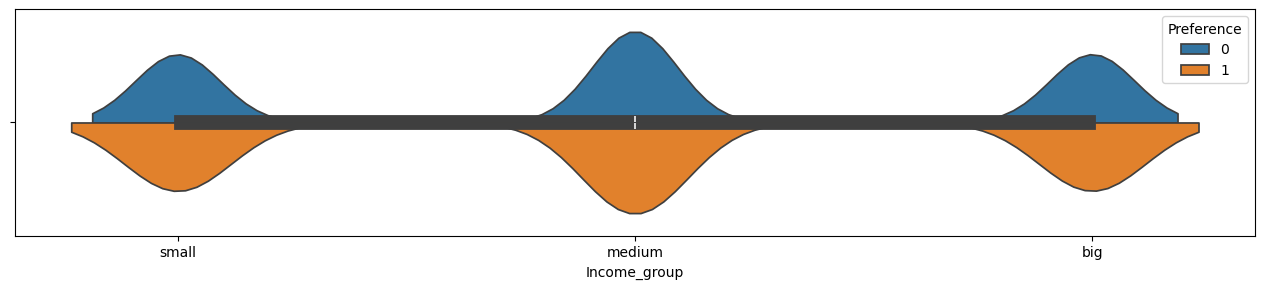

In [53]:
fig = plt.figure(figsize = (16,10))
g = fig.add_gridspec (3,2)
ax1 = fig.add_subplot(g[:1, 0:])
sns.violinplot(x = "Income_group", hue = 'Preference', split = True, data=data)

plt.show()
#небольшая разница, но есть - возьмем в итоговую выборку

In [54]:
# small - базовая переменная
data = pd.get_dummies(data, columns=['Income_group'], drop_first=True)
data.head()

,Age,Gender,Income,Education_Level,Travel_Frequency,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,...,Preferred_Activities_skiing,Preferred_Activities_sunbathing,Preferred_Activities_swimming,Age_group_adult,Age_group_senior,ratio_Vacation_Budget,Vacation_Budget_group_medium,Vacation_Budget_group_big,Income_group_medium,Income_group_big
0,56,1,71477,bachelor,9,2477,urban,175,267,summer,...,1,0,0,0,1,0.034655,1,0,True,False
1,69,1,88740,master,1,4777,suburban,228,190,fall,...,0,0,1,0,1,0.053831,0,1,True,False
2,46,0,46562,master,0,1469,urban,71,280,winter,...,1,0,0,1,0,0.031549,0,0,False,False
3,32,2,99044,high school,6,1482,rural,31,255,summer,...,0,0,0,1,0,0.014963,0,0,False,True
4,60,0,106583,high school,5,516,suburban,23,151,winter,...,0,1,0,0,1,0.004841,0,0,False,True


In [55]:
data['Income_group_medium'] = data['Income_group_medium'].replace({'False': 0, 'True': 1}).astype(int)
data['Income_group_big'] = data['Income_group_big'].replace({'False': 0, 'True': 1}).astype(int)
data.head()

,Age,Gender,Income,Education_Level,Travel_Frequency,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,...,Preferred_Activities_skiing,Preferred_Activities_sunbathing,Preferred_Activities_swimming,Age_group_adult,Age_group_senior,ratio_Vacation_Budget,Vacation_Budget_group_medium,Vacation_Budget_group_big,Income_group_medium,Income_group_big
0,56,1,71477,bachelor,9,2477,urban,175,267,summer,...,1,0,0,0,1,0.034655,1,0,1,0
1,69,1,88740,master,1,4777,suburban,228,190,fall,...,0,0,1,0,1,0.053831,0,1,1,0
2,46,0,46562,master,0,1469,urban,71,280,winter,...,1,0,0,1,0,0.031549,0,0,0,0
3,32,2,99044,high school,6,1482,rural,31,255,summer,...,0,0,0,1,0,0.014963,0,0,0,1
4,60,0,106583,high school,5,516,suburban,23,151,winter,...,0,1,0,0,1,0.004841,0,0,0,1


In [56]:
features = ['Proximity_to_Mountains', 'Proximity_to_Beaches', 'Pets', 'Preferred_Activities_skiing', 'Preferred_Activities_sunbathing',
            'Preferred_Activities_swimming', 'Age_group_adult', 'Age_group_senior',
            'Vacation_Budget_group_medium', 'Vacation_Budget_group_big', 'Income_group_medium', 'Income_group_big' ]

**Travel_Frequency**

In [58]:
#travel_frequency
print(data['Travel_Frequency'].unique())
print(data['Travel_Frequency'].min())
print(data['Travel_Frequency'].max())

[9 1 0 6 5 3 8 4 7 2]
0
9


In [59]:
data['Travel_Frequency_group'] = pd.cut(data['Travel_Frequency'], bins=[-1, 2, 5, 7, 10], labels=['small', 'medium', 'big', 'very big'])
data.head()

,Age,Gender,Income,Education_Level,Travel_Frequency,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,...,Preferred_Activities_sunbathing,Preferred_Activities_swimming,Age_group_adult,Age_group_senior,ratio_Vacation_Budget,Vacation_Budget_group_medium,Vacation_Budget_group_big,Income_group_medium,Income_group_big,Travel_Frequency_group
0,56,1,71477,bachelor,9,2477,urban,175,267,summer,...,0,0,0,1,0.034655,1,0,1,0,very big
1,69,1,88740,master,1,4777,suburban,228,190,fall,...,0,1,0,1,0.053831,0,1,1,0,small
2,46,0,46562,master,0,1469,urban,71,280,winter,...,0,0,1,0,0.031549,0,0,0,0,small
3,32,2,99044,high school,6,1482,rural,31,255,summer,...,0,0,1,0,0.014963,0,0,0,1,big
4,60,0,106583,high school,5,516,suburban,23,151,winter,...,1,0,0,1,0.004841,0,0,0,1,medium


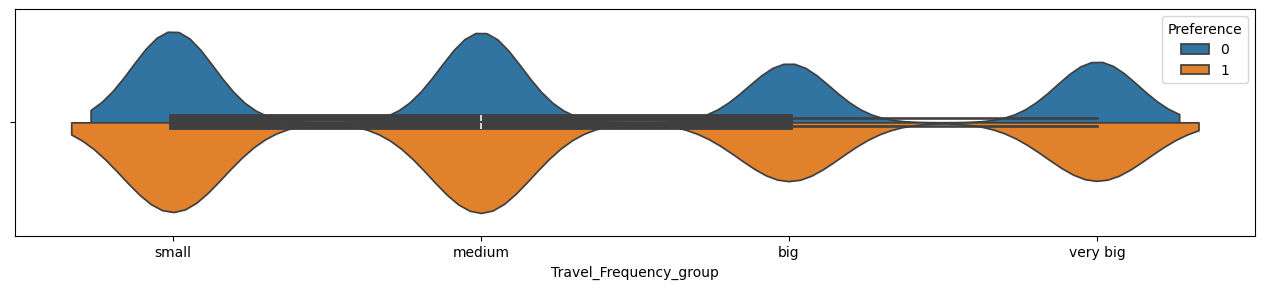

In [60]:
fig = plt.figure(figsize = (16,10))
g = fig.add_gridspec (3,2)
ax1 = fig.add_subplot(g[:1, 0:])
sns.violinplot(x = "Travel_Frequency_group", hue = 'Preference', split = True, data=data)

plt.show()
#от частоты путешествий предпочтения не зависит

In [112]:
# small - базовая переменная
data = pd.get_dummies(data, columns=['Travel_Frequency_group'], drop_first=True)
data.head()

,Age,Gender,Income,Education_Level,Travel_Frequency,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,...,Age_group_adult,Age_group_senior,ratio_Vacation_Budget,Vacation_Budget_group_medium,Vacation_Budget_group_big,Income_group_medium,Income_group_big,Travel_Frequency_group_medium,Travel_Frequency_group_big,Travel_Frequency_group_very big
0,56,1,71477,bachelor,9,2477,urban,175,267,summer,...,0,1,0.034655,1,0,1,0,False,False,True
1,69,1,88740,master,1,4777,suburban,228,190,fall,...,0,1,0.053831,0,1,1,0,False,False,False
2,46,0,46562,master,0,1469,urban,71,280,winter,...,1,0,0.031549,0,0,0,0,False,False,False
3,32,2,99044,high school,6,1482,rural,31,255,summer,...,1,0,0.014963,0,0,0,1,False,True,False
4,60,0,106583,high school,5,516,suburban,23,151,winter,...,0,1,0.004841,0,0,0,1,True,False,False


In [114]:
data['Travel_Frequency_group_medium'] = data['Travel_Frequency_group_medium'].replace({'False': 0, 'True': 1}).astype(int)
data['Travel_Frequency_group_big'] = data['Travel_Frequency_group_big'].replace({'False': 0, 'True': 1}).astype(int)
data['Travel_Frequency_group_very big'] = data['Travel_Frequency_group_very big'].replace({'False': 0, 'True': 1}).astype(int)
data.head()

,Age,Gender,Income,Education_Level,Travel_Frequency,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,...,Age_group_adult,Age_group_senior,ratio_Vacation_Budget,Vacation_Budget_group_medium,Vacation_Budget_group_big,Income_group_medium,Income_group_big,Travel_Frequency_group_medium,Travel_Frequency_group_big,Travel_Frequency_group_very big
0,56,1,71477,bachelor,9,2477,urban,175,267,summer,...,0,1,0.034655,1,0,1,0,0,0,1
1,69,1,88740,master,1,4777,suburban,228,190,fall,...,0,1,0.053831,0,1,1,0,0,0,0
2,46,0,46562,master,0,1469,urban,71,280,winter,...,1,0,0.031549,0,0,0,0,0,0,0
3,32,2,99044,high school,6,1482,rural,31,255,summer,...,1,0,0.014963,0,0,0,1,0,1,0
4,60,0,106583,high school,5,516,suburban,23,151,winter,...,0,1,0.004841,0,0,0,1,1,0,0


In [120]:
print("Travel_Frequency_group_medium: ", data['Travel_Frequency_group_medium'].corr(data['Preference']))
print("Travel_Frequency_group_big: ", data['Travel_Frequency_group_big'].corr(data['Preference']))
print("Travel_Frequency_group_very big: ", data['Travel_Frequency_group_very big'].corr(data['Preference']))

Travel_Frequency_group_medium:  0.005123878601331328
Travel_Frequency_group_big:  0.0017422978233250094
Travel_Frequency_group_very big:  -0.005813926932939566


Корреляция при Travel_Frequency очень мала.

Остальные переменные 'Location', 'Favorite_Season', 'Education_Level' закодируем после разбиения на тестовую и обучающую выборки и решим потом оставлять их или нет

## Задание 6. Разделение датасета на обучающую и тестовую выборку

In [63]:
features = ['Proximity_to_Mountains', 'Proximity_to_Beaches', 'Pets', 'Preferred_Activities_skiing', 'Preferred_Activities_sunbathing',
            'Preferred_Activities_swimming', 'Age_group_adult', 'Age_group_senior',
            'Vacation_Budget_group_medium', 'Vacation_Budget_group_big', 'Income_group_medium', 'Income_group_big',
            'Location', 'Favorite_Season', 'Education_Level', 'Preference']
data_n = data[features]
data_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52444 entries, 0 to 52443
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Proximity_to_Mountains           52444 non-null  int64 
 1   Proximity_to_Beaches             52444 non-null  int64 
 2   Pets                             52444 non-null  int64 
 3   Preferred_Activities_skiing      52444 non-null  int32 
 4   Preferred_Activities_sunbathing  52444 non-null  int32 
 5   Preferred_Activities_swimming    52444 non-null  int32 
 6   Age_group_adult                  52444 non-null  int32 
 7   Age_group_senior                 52444 non-null  int32 
 8   Vacation_Budget_group_medium     52444 non-null  int32 
 9   Vacation_Budget_group_big        52444 non-null  int32 
 10  Income_group_medium              52444 non-null  int32 
 11  Income_group_big                 52444 non-null  int32 
 12  Location                        

In [64]:
from sklearn.model_selection import train_test_split
d_train, d_test = train_test_split(data_n, test_size=0.2)

In [65]:
d_train.shape, d_test.shape

((41955, 16), (10489, 16))

In [81]:
print("Preferred_Activities_skiing: ", d_train['Preferred_Activities_skiing'].corr(d_train['Preference']))
print("Preferred_Activities_sunbathing: ", d_train['Preferred_Activities_sunbathing'].corr(d_train['Preference']))
print("Preferred_Activities_swimming: ", d_train['Preferred_Activities_swimming'].corr(d_train['Preference']))
print("Age_group_adult: ", d_train['Age_group_adult'].corr(d_train['Preference']))
print("Age_group_senior: ", d_train['Age_group_senior'].corr(d_train['Preference']))
print("Vacation_Budget_group_medium: ", d_train['Vacation_Budget_group_medium'].corr(d_train['Preference']))
print("Vacation_Budget_group_big: ", d_train['Vacation_Budget_group_big'].corr(d_train['Preference']))
print("Income_group_medium: ", d_train['Income_group_medium'].corr(d_train['Preference']))
print("Income_group_big: ", d_train['Income_group_big'].corr(d_train['Preference']))

Preferred_Activities_skiing:  0.3344039021161486
Preferred_Activities_sunbathing:  -0.33763253121448544
Preferred_Activities_swimming:  -0.3303891619969978
Age_group_adult:  -0.0022799911260072314
Age_group_senior:  0.0017287296236154417
Vacation_Budget_group_medium:  0.0009425369171490428
Vacation_Budget_group_big:  -0.0033317915384614423
Income_group_medium:  0.0013948867415124694
Income_group_big:  -0.0008504244851812749


#### Кодирование простым средним значением зависимой переменной

**Location**

In [83]:
print(d_train['Location'].unique())

['urban' 'rural' 'suburban']


In [85]:
dict = {}
for cat in d_train['Location'].unique():
    n_i = d_train['Location'].value_counts().loc[cat]
    n_iy = len(d_train[(d_train['Preference'] == 1) & (d_train['Location'] == cat)])
    em_like = n_iy / n_i
    dict[cat] = em_like
dict

{'urban': 0.250464883421542,
 'rural': 0.25279369627507164,
 'suburban': 0.24962534789124385}

In [87]:
d_train['Location'] = d_train['Location'].replace(dict)
d_train['Location'] = d_train['Location'].infer_objects().astype(float)

d_train.head()
print("location: ", d_train['Location'].corr(d_train['Preference']))
#возьмем в итоговую выборку

location:  0.0030905337960362646


C:\Users\ElenaKosteva\AppData\Local\Temp\ipykernel_1868\960209220.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d_train['Location'] = d_train['Location'].replace(dict)


In [89]:
dict = {}
for cat in d_test['Location'].unique():
    n_i = d_test['Location'].value_counts().loc[cat]
    n_iy = len(d_test[(d_test['Preference'] == 1) & (d_test['Location'] == cat)])
    em_like = n_iy / n_i
    dict[cat] = em_like
dict
d_test['Location'] = d_test['Location'].replace(dict)
d_test['Location'] = d_test['Location'].infer_objects().astype(float)

d_test.head()
print("location: ", d_test['Location'].corr(d_test['Preference']))

location:  0.010857830753459996


C:\Users\ElenaKosteva\AppData\Local\Temp\ipykernel_1868\1278424370.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d_test['Location'] = d_test['Location'].replace(dict)


**Favorite_Season**

In [92]:
print(d_train['Favorite_Season'].unique())

['fall' 'summer' 'winter' 'spring']


In [94]:
dict = {}
for cat in d_train['Favorite_Season'].unique():
    n_i = d_train['Favorite_Season'].value_counts().loc[cat]
    n_iy = len(d_train[(d_train['Preference'] == 1) & (d_train['Favorite_Season'] == cat)])
    em_like = n_iy / n_i
    dict[cat] = em_like
dict

{'fall': 0.2499526604809695,
 'summer': 0.24906261717285338,
 'winter': 0.2515620494088244,
 'spring': 0.2533423755086224}

In [96]:
d_train['Favorite_Season'] = d_train['Favorite_Season'].replace(dict)
d_train['Favorite_Season'] = d_train['Favorite_Season'].infer_objects().astype(float)

d_train.head()
print("favorite_season: ", d_train['Favorite_Season'].corr(d_train['Preference']))
# берем в итоговую выборку

favorite_season:  0.0037596657879409067


C:\Users\ElenaKosteva\AppData\Local\Temp\ipykernel_1868\838842867.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d_train['Favorite_Season'] = d_train['Favorite_Season'].replace(dict)


In [107]:
dict = {}
for cat in d_test['Favorite_Season'].unique():
    n_i = d_test['Favorite_Season'].value_counts().loc[cat]
    n_iy = len(d_test[(d_test['Preference'] == 1) & (d_test['Favorite_Season'] == cat)])
    em_like = n_iy / n_i
    dict[cat] = em_like
dict
d_test['Favorite_Season'] = d_test['Favorite_Season'].replace(dict)
d_test['Favorite_Season'] = d_test['Favorite_Season'].infer_objects().astype(float)

d_test.head()
print("favorite_season: ", d_test['Favorite_Season'].corr(d_test['Preference']))

favorite_season:  0.017883424533034917


C:\Users\ElenaKosteva\AppData\Local\Temp\ipykernel_1868\874832811.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d_test['Favorite_Season'] = d_test['Favorite_Season'].replace(dict)


**Education_Level**

In [99]:
print(d_train['Education_Level'].unique())

['master' 'bachelor' 'high school' 'doctorate']


In [101]:
dict = {}
for cat in d_train['Education_Level'].unique():
    n_i = d_train['Education_Level'].value_counts().loc[cat]
    n_iy = len(d_train[(d_train['Preference'] == 1) & (d_train['Education_Level'] == cat)])
    em_like = n_iy / n_i
    dict[cat] = em_like
dict

{'master': 0.24850009676795046,
 'bachelor': 0.25522373819292055,
 'high school': 0.25910310463779224,
 'doctorate': 0.24121823617339314}

In [103]:
d_train['Education_Level'] = d_train['Education_Level'].replace(dict)
d_train['Education_Level'] = d_train['Education_Level'].infer_objects().astype(float)

d_train.head()
print("education_level: ", d_train['Education_Level'].corr(d_train['Preference']))
# берем в итоговую выборку

education_level:  0.015768235180333868


C:\Users\ElenaKosteva\AppData\Local\Temp\ipykernel_1868\4269831444.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d_train['Education_Level'] = d_train['Education_Level'].replace(dict)


In [105]:
dict = {}
for cat in d_test['Education_Level'].unique():
    n_i = d_test['Education_Level'].value_counts().loc[cat]
    n_iy = len(d_test[(d_test['Preference'] == 1) & (d_test['Education_Level'] == cat)])
    em_like = n_iy / n_i
    dict[cat] = em_like
dict

d_test['Education_Level'] = d_test['Education_Level'].replace(dict)
d_test['Education_Level'] = d_test['Education_Level'].infer_objects().astype(float)

d_test.head()
print("education_level: ", d_test['Education_Level'].corr(d_test['Preference']))

education_level:  0.006904117082543535


C:\Users\ElenaKosteva\AppData\Local\Temp\ipykernel_1868\1038867540.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d_test['Education_Level'] = d_test['Education_Level'].replace(dict)


#### Итого

In [109]:
print("Preferred_Activities_skiing: ", d_train['Preferred_Activities_skiing'].corr(d_train['Preference']))
print("Preferred_Activities_sunbathing: ", d_train['Preferred_Activities_sunbathing'].corr(d_train['Preference']))
print("Preferred_Activities_swimming: ", d_train['Preferred_Activities_swimming'].corr(d_train['Preference']))
print("Age_group_adult: ", d_train['Age_group_adult'].corr(d_train['Preference']))
print("Age_group_senior: ", d_train['Age_group_senior'].corr(d_train['Preference']))
print("Vacation_Budget_group_medium: ", d_train['Vacation_Budget_group_medium'].corr(d_train['Preference']))
print("Vacation_Budget_group_big: ", d_train['Vacation_Budget_group_big'].corr(d_train['Preference']))
print("Income_group_medium: ", d_train['Income_group_medium'].corr(d_train['Preference']))
print("Income_group_big: ", d_train['Income_group_big'].corr(d_train['Preference']))
print("location: ", d_train['Location'].corr(d_train['Preference']))
print("favorite_season: ", d_train['Favorite_Season'].corr(d_train['Preference']))
print("education_level: ", d_train['Education_Level'].corr(d_train['Preference']))

Preferred_Activities_skiing:  0.3344039021161486
Preferred_Activities_sunbathing:  -0.33763253121448544
Preferred_Activities_swimming:  -0.3303891619969978
Age_group_adult:  -0.0022799911260072314
Age_group_senior:  0.0017287296236154417
Vacation_Budget_group_medium:  0.0009425369171490428
Vacation_Budget_group_big:  -0.0033317915384614423
Income_group_medium:  0.0013948867415124694
Income_group_big:  -0.0008504244851812749
location:  0.0030905337960362646
favorite_season:  0.0037596657879409067
education_level:  0.015768235180333868


Из этого видно, что все группы возраста и дохода очень мало коррелируют с предпочтением отдыха - можно попробовать посмотреть модели с ними и без них

In [137]:
features = ['Proximity_to_Mountains', 'Proximity_to_Beaches', 'Pets', 'Preferred_Activities_skiing', 'Preferred_Activities_sunbathing',
            'Preferred_Activities_swimming', 'Age_group_adult', 'Age_group_senior',
            'Vacation_Budget_group_medium', 'Vacation_Budget_group_big', 'Income_group_medium', 'Income_group_big', 'Favorite_Season',
            'Location', 'Education_Level']
features_age = ['Proximity_to_Mountains', 'Proximity_to_Beaches', 'Pets', 'Preferred_Activities_skiing', 'Preferred_Activities_sunbathing',
            'Preferred_Activities_swimming', 'Vacation_Budget_group_medium', 'Vacation_Budget_group_big', 'Income_group_medium', 
            'Income_group_big', 'Favorite_Season', 'Location', 'Education_Level']
features_inc = ['Proximity_to_Mountains', 'Proximity_to_Beaches', 'Pets', 'Preferred_Activities_skiing', 'Preferred_Activities_sunbathing',
            'Preferred_Activities_swimming', 'Age_group_adult', 'Age_group_senior',
            'Vacation_Budget_group_medium', 'Vacation_Budget_group_big','Favorite_Season', 'Location', 'Education_Level']
features_zn = ['Proximity_to_Mountains', 'Proximity_to_Beaches', 'Pets', 'Preferred_Activities_skiing', 'Preferred_Activities_sunbathing',
            'Preferred_Activities_swimming', 'Vacation_Budget_group_medium', 'Vacation_Budget_group_big', 'Favorite_Season',
            'Location', 'Education_Level']
X_train = d_train[features]
X_train_age = d_train[features_age]
X_train_inc = d_train[features_inc]
X_train_zn = d_train[features_zn]
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41955 entries, 18215 to 5082
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Proximity_to_Mountains           41955 non-null  int64  
 1   Proximity_to_Beaches             41955 non-null  int64  
 2   Pets                             41955 non-null  int64  
 3   Preferred_Activities_skiing      41955 non-null  int32  
 4   Preferred_Activities_sunbathing  41955 non-null  int32  
 5   Preferred_Activities_swimming    41955 non-null  int32  
 6   Age_group_adult                  41955 non-null  int32  
 7   Age_group_senior                 41955 non-null  int32  
 8   Vacation_Budget_group_medium     41955 non-null  int32  
 9   Vacation_Budget_group_big        41955 non-null  int32  
 10  Income_group_medium              41955 non-null  int32  
 11  Income_group_big                 41955 non-null  int32  
 12  Favorite_Season     

In [139]:
X_test = d_test[features]
X_test_age = d_test[features_age]
X_test_inc = d_test[features_inc]
X_test_zn = d_test[features_zn]
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10489 entries, 22084 to 8054
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Proximity_to_Mountains           10489 non-null  int64  
 1   Proximity_to_Beaches             10489 non-null  int64  
 2   Pets                             10489 non-null  int64  
 3   Preferred_Activities_skiing      10489 non-null  int32  
 4   Preferred_Activities_sunbathing  10489 non-null  int32  
 5   Preferred_Activities_swimming    10489 non-null  int32  
 6   Age_group_adult                  10489 non-null  int32  
 7   Age_group_senior                 10489 non-null  int32  
 8   Vacation_Budget_group_medium     10489 non-null  int32  
 9   Vacation_Budget_group_big        10489 non-null  int32  
 10  Income_group_medium              10489 non-null  int32  
 11  Income_group_big                 10489 non-null  int32  
 12  Favorite_Season     

In [141]:
Y_train = d_train['Preference']
Y_train.info()

<class 'pandas.core.series.Series'>
Index: 41955 entries, 18215 to 5082
Series name: Preference
Non-Null Count  Dtype
--------------  -----
41955 non-null  int64
dtypes: int64(1)
memory usage: 655.5 KB


In [143]:
Y_test = d_test['Preference']
Y_test.info()

<class 'pandas.core.series.Series'>
Index: 10489 entries, 22084 to 8054
Series name: Preference
Non-Null Count  Dtype
--------------  -----
10489 non-null  int64
dtypes: int64(1)
memory usage: 163.9 KB


In [145]:
X_train.shape, Y_train.shape

((41955, 15), (41955,))

In [147]:
X_test.shape, Y_test.shape

((10489, 15), (10489,))

## Задание 7. Машинное обучение и оценка результатов

Вы описываете метрику, которую выбрали для оценки качества модели и сравниваете по ней результаты. Здесь можно сравнить эффективной разных моделей, которые вы выбрали, можно попробовать подавать разные призные признаки на вход, можно посмотреть как меняются результаты в зависимости от объема тестовой и обучающей выборки. 

**Gradient Boosting**

In [165]:
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0)
gb_classifier.fit(X_train, Y_train)
Y_gb = gb_classifier.predict(X_test)

gb_classifier.fit(X_train_age, Y_train)
Y_gb_age = gb_classifier.predict(X_test_age)

gb_classifier.fit(X_train_inc, Y_train)
Y_gb_inc = gb_classifier.predict(X_test_inc)

gb_classifier.fit(X_train_zn, Y_train)
Y_gb_zn = gb_classifier.predict(X_test_zn)


**Random Forest**

In [167]:
rf_classifier = RandomForestClassifier(max_depth=5, n_estimators=100)
rf_classifier.fit(X_train, Y_train)
Y_rf = rf_classifier.predict(X_test)

rf_classifier.fit(X_train_age, Y_train)
Y_rf_age = rf_classifier.predict(X_test_age)

rf_classifier.fit(X_train_inc, Y_train)
Y_rf_inc = rf_classifier.predict(X_test_inc)

rf_classifier.fit(X_train_zn, Y_train)
Y_rf_zn = rf_classifier.predict(X_test_zn)

### Оценка результатов

In [191]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

##### Gradient Boosting

In [177]:
accuracy = accuracy_score(Y_test, Y_gb)
precision = precision_score(Y_test, Y_gb)
recall = recall_score(Y_test, Y_gb)
f1 = f1_score(Y_test, Y_gb)

print("Общая выборка")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Sensitivity: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Общая выборка
Accuracy: 0.9964
Precision: 0.9946
Sensitivity: 0.9908
F1 Score: 0.9927


In [179]:
accuracy = accuracy_score(Y_test, Y_gb_age)
precision = precision_score(Y_test, Y_gb_age)
recall = recall_score(Y_test, Y_gb_age)
f1 = f1_score(Y_test, Y_gb_age)

print("Выборка без возраста")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Sensitivity: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Выборка без возраста
Accuracy: 0.9965
Precision: 0.9954
Sensitivity: 0.9905
F1 Score: 0.9929


In [181]:
accuracy = accuracy_score(Y_test, Y_gb_inc)
precision = precision_score(Y_test, Y_gb_inc)
recall = recall_score(Y_test, Y_gb_inc)
f1 = f1_score(Y_test, Y_gb_inc)

print("Выборка без дохода")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Sensitivity: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Выборка без дохода
Accuracy: 0.9966
Precision: 0.9943
Sensitivity: 0.9920
F1 Score: 0.9931


In [183]:
accuracy = accuracy_score(Y_test, Y_gb_zn)
precision = precision_score(Y_test, Y_gb_zn)
recall = recall_score(Y_test, Y_gb_zn)
f1 = f1_score(Y_test, Y_gb_zn)

print("Выборка без малозначимых")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Sensitivity: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Выборка без малозначимых
Accuracy: 0.9964
Precision: 0.9950
Sensitivity: 0.9905
F1 Score: 0.9927


**Выборка без дохода** лучше всего по Accuracy, 
Sensitivi, 5
F1 Sc - поэтому выберем ее как лучшую и рассмотрим матрицу ошибокore

accuracy: 0.9966
sensitivity: 0.9920
specificity: 0.9981
one_minus_specificity: 0.0019
precision: 0.9943
f1_score: 0.9931


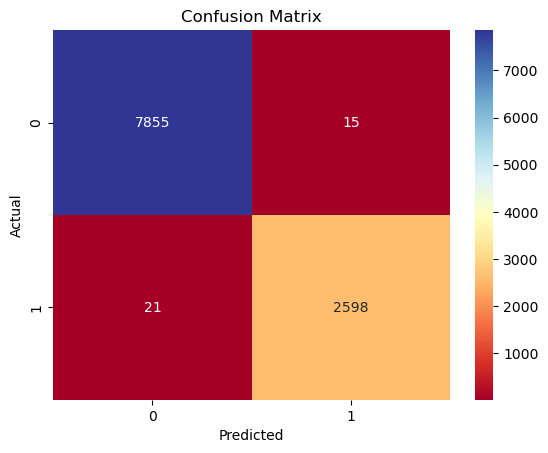

In [186]:
mat = confusion_matrix(Y_test, Y_gb_inc)

TN, FP, FN, TP = mat.ravel()
accuracy = (TP + TN) / (TN + FP + FN + TP)
sensitivity = TP / (TP + FN) #сколько верно спрогнозировано 
# выживших по сравнению еще с теми, кого ошибочно посчитали утоновшими
specificity = TN / (TN + FP)  #сколько верно спрогнозировано 
# невыживших по сравнению еще с теми, кого ошибочно посчитали выжившими
one_minus_specificity = FP / (FP + TN) #сколько ошибочно выживших по сравнению еще с теми,
# кого верно спрогнозировали невыжившими
precision = TP / (TP + FP) # сколько верно спрогнозировано выживших по сравнению еще с теми,
# кого ошибочно посчитали выжившими
f1_score = 2 * (precision * sensitivity / (precision + sensitivity)) 
#это гармоническое среднее между Precision и Sensitivity.

print(f"accuracy: {accuracy:.4f}")
print(f"sensitivity: {sensitivity:.4f}")
print(f"specificity: {specificity:.4f}")
print(f"one_minus_specificity: {one_minus_specificity:.4f}")
print(f"precision: {precision:.4f}")
print(f"f1_score: {f1_score:.4f}")


sns.heatmap(mat, annot=True, fmt='d', cmap='RdYlBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##### Random Forest

In [193]:
accuracy = accuracy_score(Y_test, Y_rf)
precision = precision_score(Y_test, Y_rf)
recall = recall_score(Y_test, Y_rf)
f1 = f1_score(Y_test, Y_rf)

print("Общая выборка")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Sensitivity: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Общая выборка
Accuracy: 0.9161
Precision: 0.9966
Sensitivity: 0.6663
F1 Score: 0.7986


In [195]:
accuracy = accuracy_score(Y_test, Y_rf_age)
precision = precision_score(Y_test, Y_rf_age)
recall = recall_score(Y_test, Y_rf_age)
f1 = f1_score(Y_test, Y_rf_age)

print("Выборка без возраста")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Sensitivity: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Выборка без возраста
Accuracy: 0.9302
Precision: 0.9927
Sensitivity: 0.7258
F1 Score: 0.8386


In [197]:
accuracy = accuracy_score(Y_test, Y_rf_inc)
precision = precision_score(Y_test, Y_rf_inc)
recall = recall_score(Y_test, Y_rf_inc)
f1 = f1_score(Y_test, Y_rf_inc)

print("Выборка без дохода")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Sensitivity: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Выборка без дохода
Accuracy: 0.9254
Precision: 0.9989
Sensitivity: 0.7022
F1 Score: 0.8247


In [199]:
accuracy = accuracy_score(Y_test, Y_rf_zn)
precision = precision_score(Y_test, Y_rf_zn)
recall = recall_score(Y_test, Y_rf_zn)
f1 = f1_score(Y_test, Y_rf_zn)

print("Выборка без малозначимых")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Sensitivity: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Выборка без малозначимых
Accuracy: 0.9492
Precision: 0.9901
Sensitivity: 0.8045
F1 Score: 0.8877


**Выборка без малозначимых** лучше всего по Accuracy, Sensitivity, F1 Score - поэтому выберем ее как лучшую и рассмотрим матрицу ошибок

accuracy: 0.9492
sensitivity: 0.8045
specificity: 0.9973
one_minus_specificity: 0.0027
precision: 0.9901
f1_score: 0.8877


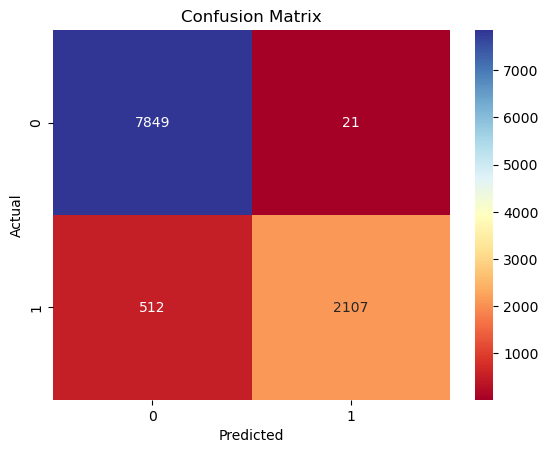

In [203]:
mat = confusion_matrix(Y_test, Y_rf_zn)

TN, FP, FN, TP = mat.ravel()
accuracy = (TP + TN) / (TN + FP + FN + TP)
sensitivity = TP / (TP + FN) #сколько верно спрогнозировано 
# выживших по сравнению еще с теми, кого ошибочно посчитали утоновшими
specificity = TN / (TN + FP)  #сколько верно спрогнозировано 
# невыживших по сравнению еще с теми, кого ошибочно посчитали выжившими
one_minus_specificity = FP / (FP + TN) #сколько ошибочно выживших по сравнению еще с теми,
# кого верно спрогнозировали невыжившими
precision = TP / (TP + FP) # сколько верно спрогнозировано выживших по сравнению еще с теми,
# кого ошибочно посчитали выжившими
f1_score = 2 * (precision * sensitivity / (precision + sensitivity)) 
#это гармоническое среднее между Precision и Sensitivity.

print(f"accuracy: {accuracy:.4f}")
print(f"sensitivity: {sensitivity:.4f}")
print(f"specificity: {specificity:.4f}")
print(f"one_minus_specificity: {one_minus_specificity:.4f}")
print(f"precision: {precision:.4f}")
print(f"f1_score: {f1_score:.4f}")


sns.heatmap(mat, annot=True, fmt='d', cmap='RdYlBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Выводы

В задаче нам важны точность, специфичность, чувствительность и среднее между точностью и чувствительностью.

1. **Модель Gradient Boosting**:
- Accuracy: 0.9966
- Sensitivity: 0.9920
- Specificity: 0.9981
- Precision: 0.9943
- F1-score: 0.9931
  
2. **Модель Random Forest**:
- Accuracy: 0.9492
- Sensitivity: 0.8045
- Specificity: 0.9973 
- Precision: 0.9901
- F1-score: 0.8877

**Итого:** по всем запросам подходит больше всего модель *градиентного бустинга*, так как она имеет самую высокую правильность (99.66%), наилучшую специфичность (99.81%), хорошую чувствительность (99.2%) и высокую точность (99.43%). Она минимизирует как ложные положительные, так и ложные отрицательные ошибки, что делает её наиболее надежной для предсказания предпочтений по отдыху.